# Método de Bolsa de Palabras (BOW), Vectores TF y Vectores TF-IDF

Nuestro objetivo es encontrar una representación numérica de palabras (tokens) que de alguna manera capture la importancia o el contenido de información de las palabras que representa.
# Bolsa de Palabras (BOW) para vectorizar documentos

 Como primera aproximación, asumiremos que cuantas más veces aparece una palabra, más significado contribuye a ese documento. Es decir, esa palabra es más importante para ese documento.

IDF: CUANTAS VECES LA PALABRA ESTA EN LOS DIFERENTES DOC

In [1]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """La UFRO está en Temuco, y yo estudio en la ufro."""
tokenizer = TreebankWordTokenizer()
#palabras en minusculas y las voy a tokenizar
tokens = tokenizer.tokenize(sentence.lower())
tokens

['la',
 'ufro',
 'está',
 'en',
 'temuco',
 ',',
 'y',
 'yo',
 'estudio',
 'en',
 'la',
 'ufro',
 '.']

In [2]:
#cuantas veces aparece la palabra en un doc
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words

Counter({'la': 2,
         'ufro': 2,
         'en': 2,
         'está': 1,
         'temuco': 1,
         ',': 1,
         'y': 1,
         'yo': 1,
         'estudio': 1,
         '.': 1})

In [3]:
bag_of_words.most_common()

[('la', 2),
 ('ufro', 2),
 ('en', 2),
 ('está', 1),
 ('temuco', 1),
 (',', 1),
 ('y', 1),
 ('yo', 1),
 ('estudio', 1),
 ('.', 1)]

In [4]:
ufro = bag_of_words['ufro']
print(ufro)

2


In [5]:
num_words = len(bag_of_words) # cuantas palabras hay
print(num_words)

10


In [6]:
tf_ufro = ufro / num_words
print(tf_ufro)

0.2


In [7]:
la = bag_of_words['la']
num_words = len(bag_of_words)
tf_la = la / num_words
print(tf_la)

0.2


Tomemos un documento más extenso.

In [99]:
kite_text = open(r'kite_text.txt','r')
kite_text = kite_text.read()
print(kite_text)

A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite's wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite.

The lift that sustains the kite in flight is generated when air flows around the kite's surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or mo

In [10]:
#Construir la Bolsa de palabras
tokenizer = TreebankWordTokenizer()
#tokenizo, minuscula
tokens = tokenizer.tokenize(kite_text.lower())
print(tokens)
#imprimo cantidad de palabras
print(len(tokens))

['a', 'kite', 'is', 'traditionally', 'a', 'tethered', 'heavier-than-air', 'craft', 'with', 'wing', 'surfaces', 'that', 'react', 'against', 'the', 'air', 'to', 'create', 'lift', 'and', 'drag.', 'a', 'kite', 'consists', 'of', 'wings', ',', 'tethers', ',', 'and', 'anchors.', 'kites', 'often', 'have', 'a', 'bridle', 'to', 'guide', 'the', 'face', 'of', 'the', 'kite', 'at', 'the', 'correct', 'angle', 'so', 'the', 'wind', 'can', 'lift', 'it.', 'a', 'kite', "'s", 'wing', 'also', 'may', 'be', 'so', 'designed', 'so', 'a', 'bridle', 'is', 'not', 'needed', ';', 'when', 'kiting', 'a', 'sailplane', 'for', 'launch', ',', 'the', 'tether', 'meets', 'the', 'wing', 'at', 'a', 'single', 'point.', 'a', 'kite', 'may', 'have', 'fixed', 'or', 'moving', 'anchors.', 'untraditionally', 'in', 'technical', 'kiting', ',', 'a', 'kite', 'consists', 'of', 'tether-set-coupled', 'wing', 'sets', ';', 'even', 'in', 'technical', 'kiting', ',', 'though', ',', 'a', 'wing', 'in', 'the', 'system', 'is', 'still', 'often', 'call

In [11]:
token_counts = Counter(tokens)
#nro de palabras distintas del doc, un diccionario
print(token_counts)
print(len(token_counts))

Counter({'the': 26, 'a': 20, 'kite': 16, ',': 15, 'and': 10, 'of': 10, 'kites': 8, 'is': 7, 'in': 7, 'or': 6, 'wing': 5, 'to': 5, 'be': 5, 'as': 5, 'lift': 4, 'have': 4, 'may': 4, 'at': 3, 'so': 3, 'can': 3, 'also': 3, 'kiting': 3, 'are': 3, 'flown': 3, 'tethered': 2, 'craft': 2, 'with': 2, 'that': 2, 'air': 2, 'consists': 2, 'tethers': 2, 'anchors.': 2, 'often': 2, 'bridle': 2, 'wind': 2, "'s": 2, 'designed': 2, ';': 2, 'when': 2, 'for': 2, 'moving': 2, 'technical': 2, 'even': 2, 'called': 2, 'surface': 2, 'pressure': 2, 'drag': 2, 'force': 2, 'by': 2, 'which': 2, '.': 2, 'used': 2, 'power': 2, 'traditionally': 1, 'heavier-than-air': 1, 'surfaces': 1, 'react': 1, 'against': 1, 'create': 1, 'drag.': 1, 'wings': 1, 'guide': 1, 'face': 1, 'correct': 1, 'angle': 1, 'it.': 1, 'not': 1, 'needed': 1, 'sailplane': 1, 'launch': 1, 'tether': 1, 'meets': 1, 'single': 1, 'point.': 1, 'fixed': 1, 'untraditionally': 1, 'tether-set-coupled': 1, 'sets': 1, 'though': 1, 'system': 1, 'still': 1, 'kite.

In [12]:
total_tokens= sum(token_counts.values())
total_tokens

363

Reduzco tamaño de mi vector

In [13]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
#quito stopwords
tokens = [x for x in tokens if x not in stopwords]
print(tokens)
#imprimo largo de palabras
print(len(tokens))

['kite', 'traditionally', 'tethered', 'heavier-than-air', 'craft', 'wing', 'surfaces', 'react', 'air', 'create', 'lift', 'drag.', 'kite', 'consists', 'wings', ',', 'tethers', ',', 'anchors.', 'kites', 'often', 'bridle', 'guide', 'face', 'kite', 'correct', 'angle', 'wind', 'lift', 'it.', 'kite', "'s", 'wing', 'also', 'may', 'designed', 'bridle', 'needed', ';', 'kiting', 'sailplane', 'launch', ',', 'tether', 'meets', 'wing', 'single', 'point.', 'kite', 'may', 'fixed', 'moving', 'anchors.', 'untraditionally', 'technical', 'kiting', ',', 'kite', 'consists', 'tether-set-coupled', 'wing', 'sets', ';', 'even', 'technical', 'kiting', ',', 'though', ',', 'wing', 'system', 'still', 'often', 'called', 'kite.', 'lift', 'sustains', 'kite', 'flight', 'generated', 'air', 'flows', 'around', 'kite', "'s", 'surface', ',', 'producing', 'low', 'pressure', 'high', 'pressure', 'wings.', 'interaction', 'wind', 'also', 'generates', 'horizontal', 'drag', 'along', 'direction', 'wind.', 'resultant', 'force', 've

In [14]:
# no contar set()
puntuacion = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
tokens = [x for x in tokens if x not in puntuacion]
print(tokens)
print(len(tokens))

['kite', 'traditionally', 'tethered', 'heavier-than-air', 'craft', 'wing', 'surfaces', 'react', 'air', 'create', 'lift', 'drag.', 'kite', 'consists', 'wings', 'tethers', 'anchors.', 'kites', 'often', 'bridle', 'guide', 'face', 'kite', 'correct', 'angle', 'wind', 'lift', 'it.', 'kite', "'s", 'wing', 'also', 'may', 'designed', 'bridle', 'needed', 'kiting', 'sailplane', 'launch', 'tether', 'meets', 'wing', 'single', 'point.', 'kite', 'may', 'fixed', 'moving', 'anchors.', 'untraditionally', 'technical', 'kiting', 'kite', 'consists', 'tether-set-coupled', 'wing', 'sets', 'even', 'technical', 'kiting', 'though', 'wing', 'system', 'still', 'often', 'called', 'kite.', 'lift', 'sustains', 'kite', 'flight', 'generated', 'air', 'flows', 'around', 'kite', "'s", 'surface', 'producing', 'low', 'pressure', 'high', 'pressure', 'wings.', 'interaction', 'wind', 'also', 'generates', 'horizontal', 'drag', 'along', 'direction', 'wind.', 'resultant', 'force', 'vector', 'lift', 'drag', 'force', 'components',

In [15]:
kite_counts = Counter(tokens)
print(kite_counts)
#largo de palabras no repetidas
print(len(kite_counts))
#Sumar para comprobar
sum(kite_counts.values())

Counter({'kite': 16, 'kites': 8, 'wing': 5, 'lift': 4, 'may': 4, 'also': 3, 'kiting': 3, 'flown': 3, 'tethered': 2, 'craft': 2, 'air': 2, 'consists': 2, 'tethers': 2, 'anchors.': 2, 'often': 2, 'bridle': 2, 'wind': 2, "'s": 2, 'designed': 2, 'moving': 2, 'technical': 2, 'even': 2, 'called': 2, 'surface': 2, 'pressure': 2, 'drag': 2, 'force': 2, 'used': 2, 'power': 2, 'traditionally': 1, 'heavier-than-air': 1, 'surfaces': 1, 'react': 1, 'create': 1, 'drag.': 1, 'wings': 1, 'guide': 1, 'face': 1, 'correct': 1, 'angle': 1, 'it.': 1, 'needed': 1, 'sailplane': 1, 'launch': 1, 'tether': 1, 'meets': 1, 'single': 1, 'point.': 1, 'fixed': 1, 'untraditionally': 1, 'tether-set-coupled': 1, 'sets': 1, 'though': 1, 'system': 1, 'still': 1, 'kite.': 1, 'sustains': 1, 'flight': 1, 'generated': 1, 'flows': 1, 'around': 1, 'producing': 1, 'low': 1, 'high': 1, 'wings.': 1, 'interaction': 1, 'generates': 1, 'horizontal': 1, 'along': 1, 'direction': 1, 'wind.': 1, 'resultant': 1, 'vector': 1, 'components'

201

In [17]:
#las mas frecuentes, para saber de qué esta hablando el doc
kite_counts.most_common()[:10]

[('kite', 16),
 ('kites', 8),
 ('wing', 5),
 ('lift', 4),
 ('may', 4),
 ('also', 3),
 ('kiting', 3),
 ('flown', 3),
 ('tethered', 2),
 ('craft', 2)]

Al observar únicamente el número de veces que aparecen palabras en este documento, estamos aprendiendo algo al respecto. Los términos kite(s) lift y wing son importantes. Y, si no sabíamos de qué se trataba este
documento, es posible que ahora podamos inferir que tiene algo que ver con "vuelo" o " cometas ".
# Vectores TF (Frecuencia de Términos)
Para cada token t en el documento d, calculamos:
tf(t, d) =cantidad de apariciones de t en d/cantidad de tokens en d 

(valor tf del token t en el documento d)

t: todas las columnas de la matriz
d: filas de matriz

In [18]:
# Denominador
len(tokens)

201

In [19]:
print(len(kite_counts.most_common()))
kite_counts.most_common()

142


[('kite', 16),
 ('kites', 8),
 ('wing', 5),
 ('lift', 4),
 ('may', 4),
 ('also', 3),
 ('kiting', 3),
 ('flown', 3),
 ('tethered', 2),
 ('craft', 2),
 ('air', 2),
 ('consists', 2),
 ('tethers', 2),
 ('anchors.', 2),
 ('often', 2),
 ('bridle', 2),
 ('wind', 2),
 ("'s", 2),
 ('designed', 2),
 ('moving', 2),
 ('technical', 2),
 ('even', 2),
 ('called', 2),
 ('surface', 2),
 ('pressure', 2),
 ('drag', 2),
 ('force', 2),
 ('used', 2),
 ('power', 2),
 ('traditionally', 1),
 ('heavier-than-air', 1),
 ('surfaces', 1),
 ('react', 1),
 ('create', 1),
 ('drag.', 1),
 ('wings', 1),
 ('guide', 1),
 ('face', 1),
 ('correct', 1),
 ('angle', 1),
 ('it.', 1),
 ('needed', 1),
 ('sailplane', 1),
 ('launch', 1),
 ('tether', 1),
 ('meets', 1),
 ('single', 1),
 ('point.', 1),
 ('fixed', 1),
 ('untraditionally', 1),
 ('tether-set-coupled', 1),
 ('sets', 1),
 ('though', 1),
 ('system', 1),
 ('still', 1),
 ('kite.', 1),
 ('sustains', 1),
 ('flight', 1),
 ('generated', 1),
 ('flows', 1),
 ('around', 1),
 ('produ

In [20]:
#VECTORIZANDO EL RECUENTO DE LA FRECUENCIA DE PALABRAS CON RESPECTO AL DOCUMENTO
document_vector = []
doc_len = len(tokens)
for key, value in kite_counts.most_common():
    #divido en tamaño doc (201)
    document_vector.append(value / doc_len)
    
print(doc_len)
print(len(document_vector))
print(document_vector)

201
142
[0.07960199004975124, 0.03980099502487562, 0.024875621890547265, 0.01990049751243781, 0.01990049751243781, 0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.009950248756218905, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004975124378109453, 0.004

Para cada token respecto al Léxico , calculamos:

tf(t, d,L) = cantidad de apariciones de t en d/cantidad de tokens en L

tf: para palabras que haya en el total de todos los doc

 (valor tf del token t dado el Léxico L)


In [21]:
#VECTORIZANDO EL RECUENTO DE LA FRECUENCIA DE PALABRAS CON RESPECTO AL LEXICO
document_vector = []
lex_len = len(kite_counts)
for key, value in kite_counts.most_common():
    document_vector.append(value / lex_len)
print(lex_len)
print(document_vector)

142
[0.11267605633802817, 0.056338028169014086, 0.035211267605633804, 0.028169014084507043, 0.028169014084507043, 0.02112676056338028, 0.02112676056338028, 0.02112676056338028, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.014084507042253521, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.007042253521126761, 0.0070422

Tomemos más documentos


In [22]:
tokenizer = TreebankWordTokenizer()
docs = ["La UFRO está en Temuco, y yo estudio en la ufro."]
docs.append("La Ufro es una universidad estatal.")
docs.append("La Facultad de Ingeniería y Ciencias es parte de la Ufro.")
docs.append("La facultad de Ingeniería de la ufro imparte clases los Viernes")
docs.append("El análisis de datos es fundamental en ingeniería")
print(docs)

['La UFRO está en Temuco, y yo estudio en la ufro.', 'La Ufro es una universidad estatal.', 'La Facultad de Ingeniería y Ciencias es parte de la Ufro.', 'La facultad de Ingeniería de la ufro imparte clases los Viernes', 'El análisis de datos es fundamental en ingeniería']


In [24]:
doc_tokens = []
for doc in docs:
    doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
#print(doc_tokens)
for doc in doc_tokens:
    print(doc)
    print(len(doc))

[',', '.', 'en', 'en', 'estudio', 'está', 'la', 'la', 'temuco', 'ufro', 'ufro', 'y', 'yo']
13
['.', 'es', 'estatal', 'la', 'ufro', 'una', 'universidad']
7
['.', 'ciencias', 'de', 'de', 'es', 'facultad', 'ingeniería', 'la', 'la', 'parte', 'ufro', 'y']
12
['clases', 'de', 'de', 'facultad', 'imparte', 'ingeniería', 'la', 'la', 'los', 'ufro', 'viernes']
11
['análisis', 'datos', 'de', 'el', 'en', 'es', 'fundamental', 'ingeniería']
8


In [25]:
all_doc_tokens = sum(doc_tokens, [])
print(all_doc_tokens)
print(len(all_doc_tokens))

[',', '.', 'en', 'en', 'estudio', 'está', 'la', 'la', 'temuco', 'ufro', 'ufro', 'y', 'yo', '.', 'es', 'estatal', 'la', 'ufro', 'una', 'universidad', '.', 'ciencias', 'de', 'de', 'es', 'facultad', 'ingeniería', 'la', 'la', 'parte', 'ufro', 'y', 'clases', 'de', 'de', 'facultad', 'imparte', 'ingeniería', 'la', 'la', 'los', 'ufro', 'viernes', 'análisis', 'datos', 'de', 'el', 'en', 'es', 'fundamental', 'ingeniería']
51


In [26]:
#las coloco en un conjunto
lexico = sorted(set(all_doc_tokens))
print(len(lexico))
print(lexico)

27
[',', '.', 'análisis', 'ciencias', 'clases', 'datos', 'de', 'el', 'en', 'es', 'estatal', 'estudio', 'está', 'facultad', 'fundamental', 'imparte', 'ingeniería', 'la', 'los', 'parte', 'temuco', 'ufro', 'una', 'universidad', 'viernes', 'y', 'yo']


In [27]:
from collections import OrderedDict
#vector de 0
zero_vector = OrderedDict((token, 0) for token in lexico)
print(len(zero_vector))
zero_vector

27


OrderedDict([(',', 0),
             ('.', 0),
             ('análisis', 0),
             ('ciencias', 0),
             ('clases', 0),
             ('datos', 0),
             ('de', 0),
             ('el', 0),
             ('en', 0),
             ('es', 0),
             ('estatal', 0),
             ('estudio', 0),
             ('está', 0),
             ('facultad', 0),
             ('fundamental', 0),
             ('imparte', 0),
             ('ingeniería', 0),
             ('la', 0),
             ('los', 0),
             ('parte', 0),
             ('temuco', 0),
             ('ufro', 0),
             ('una', 0),
             ('universidad', 0),
             ('viernes', 0),
             ('y', 0),
             ('yo', 0)])

In [28]:
import copy
from collections import Counter
from collections import OrderedDict
from nltk.tokenize import TreebankWordTokenizer
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexico)
tokenizer = TreebankWordTokenizer()
#un conjunto de doc va a convertir una funcion a tf
def TF_vec(docs, tokenizer):
    doc_tokens = []
    #tomo un doc
    for doc in docs:
        #lo rokenizo
        doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
    all_doc_tokens = sum(doc_tokens, [])
    lexico = sorted(set(all_doc_tokens))
    zero_vector = OrderedDict((token, 0) for token in lexico)
    doc_vectors = []
    for doc in docs:
        vec = copy.copy(zero_vector)
        tokens = tokenizer.tokenize(doc.lower())
        token_counts = Counter(tokens)
        for key, value in token_counts.items():
            vec[key] = value / len(lexico)
        doc_vectors.append(vec)
    return doc_vectors

doc_vectors = TF_vec(docs, tokenizer)
#primer doc
print(doc_vectors[0])

OrderedDict([(',', 0.037037037037037035), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0.07407407407407407), ('es', 0), ('estatal', 0), ('estudio', 0.037037037037037035), ('está', 0.037037037037037035), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.07407407407407407), ('los', 0), ('parte', 0), ('temuco', 0.037037037037037035), ('ufro', 0.07407407407407407), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0.037037037037037035)])


In [29]:
docs[0]

'La UFRO está en Temuco, y yo estudio en la ufro.'

In [30]:
print(doc_vectors[0])

OrderedDict([(',', 0.037037037037037035), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0.07407407407407407), ('es', 0), ('estatal', 0), ('estudio', 0.037037037037037035), ('está', 0.037037037037037035), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.07407407407407407), ('los', 0), ('parte', 0), ('temuco', 0.037037037037037035), ('ufro', 0.07407407407407407), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0.037037037037037035)])


In [31]:
print(doc_vectors[0])
print(len(doc_vectors[0]))

OrderedDict([(',', 0.037037037037037035), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0.07407407407407407), ('es', 0), ('estatal', 0), ('estudio', 0.037037037037037035), ('está', 0.037037037037037035), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.07407407407407407), ('los', 0), ('parte', 0), ('temuco', 0.037037037037037035), ('ufro', 0.07407407407407407), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0.037037037037037035)])
27


In [32]:
print(doc_vectors[1])
print(len(doc_vectors[1]))

OrderedDict([(',', 0), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0), ('es', 0.037037037037037035), ('estatal', 0.037037037037037035), ('estudio', 0), ('está', 0), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.037037037037037035), ('los', 0), ('parte', 0), ('temuco', 0), ('ufro', 0.037037037037037035), ('una', 0.037037037037037035), ('universidad', 0.037037037037037035), ('viernes', 0), ('y', 0), ('yo', 0)])
27


In [33]:
print(doc_vectors[2])
print(len(doc_vectors[2]))

OrderedDict([(',', 0), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0.037037037037037035), ('clases', 0), ('datos', 0), ('de', 0.07407407407407407), ('el', 0), ('en', 0), ('es', 0.037037037037037035), ('estatal', 0), ('estudio', 0), ('está', 0), ('facultad', 0.037037037037037035), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0.037037037037037035), ('la', 0.07407407407407407), ('los', 0), ('parte', 0.037037037037037035), ('temuco', 0), ('ufro', 0.037037037037037035), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0)])
27


In [34]:
vectors = []
for vec in doc_vectors:
    vectors.append([val for val in vec.values()])
print(doc_vectors[0])
print(vectors[0])

OrderedDict([(',', 0.037037037037037035), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0.07407407407407407), ('es', 0), ('estatal', 0), ('estudio', 0.037037037037037035), ('está', 0.037037037037037035), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.07407407407407407), ('los', 0), ('parte', 0), ('temuco', 0.037037037037037035), ('ufro', 0.07407407407407407), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0.037037037037037035)])
[0.037037037037037035, 0.037037037037037035, 0, 0, 0, 0, 0, 0, 0.07407407407407407, 0, 0, 0.037037037037037035, 0.037037037037037035, 0, 0, 0, 0, 0.07407407407407407, 0, 0, 0.037037037037037035, 0.07407407407407407, 0, 0, 0, 0.037037037037037035, 0.037037037037037035]


In [35]:
print(doc_vectors[1])
print(vectors[1])

OrderedDict([(',', 0), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0), ('es', 0.037037037037037035), ('estatal', 0.037037037037037035), ('estudio', 0), ('está', 0), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.037037037037037035), ('los', 0), ('parte', 0), ('temuco', 0), ('ufro', 0.037037037037037035), ('una', 0.037037037037037035), ('universidad', 0.037037037037037035), ('viernes', 0), ('y', 0), ('yo', 0)])
[0, 0.037037037037037035, 0, 0, 0, 0, 0, 0, 0, 0.037037037037037035, 0.037037037037037035, 0, 0, 0, 0, 0, 0, 0.037037037037037035, 0, 0, 0, 0.037037037037037035, 0.037037037037037035, 0.037037037037037035, 0, 0, 0]


In [36]:
print(doc_vectors[2])
print(vectors[2])

OrderedDict([(',', 0), ('.', 0.037037037037037035), ('análisis', 0), ('ciencias', 0.037037037037037035), ('clases', 0), ('datos', 0), ('de', 0.07407407407407407), ('el', 0), ('en', 0), ('es', 0.037037037037037035), ('estatal', 0), ('estudio', 0), ('está', 0), ('facultad', 0.037037037037037035), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0.037037037037037035), ('la', 0.07407407407407407), ('los', 0), ('parte', 0.037037037037037035), ('temuco', 0), ('ufro', 0.037037037037037035), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.037037037037037035), ('yo', 0)])
[0, 0.037037037037037035, 0, 0.037037037037037035, 0, 0, 0.07407407407407407, 0, 0, 0.037037037037037035, 0, 0, 0, 0.037037037037037035, 0, 0, 0.037037037037037035, 0.07407407407407407, 0, 0.037037037037037035, 0, 0.037037037037037035, 0, 0, 0, 0.037037037037037035, 0]


¿Cómo podremos medir la similitud entre los documentos?

Resp: Similitud Coseno.

A⋅ B = |A||B| ∗ cos(θ)

cos(θ) = (A⋅ B)/(|A||B|)

Actividad: Implementar la Similitud Coseno entre dos documentos A y B.




In [37]:
#CUAN SIMILARES SON LOS DOC ENTRE SI
import math
#diccionario
def sim_coseno(vec1, vec2):
    """ Asume que recibe diccionarios por lo que
    convertimos los diccionarios en listas"""
    #lo convierto a vectores
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    norm_1 = math.sqrt(sum([x**2 for x in vec1]))
    norm_2 = math.sqrt(sum([x**2 for x in vec2]))
    sc= (dot_prod / (norm_1 * norm_2)) if (norm_1 * norm_2) > 0 else 0
    return sc

In [38]:
docs

['La UFRO está en Temuco, y yo estudio en la ufro.',
 'La Ufro es una universidad estatal.',
 'La Facultad de Ingeniería y Ciencias es parte de la Ufro.',
 'La facultad de Ingeniería de la ufro imparte clases los Viernes',
 'El análisis de datos es fundamental en ingeniería']

In [39]:
sim_coseno(doc_vectors[4],doc_vectors[0])

0.16222142113076254

In [42]:
sim_coseno(doc_vectors[2],doc_vectors[3])

0.7100469468046932

# Análisis de Frecuencias mediante Nube de Palabras

In [44]:
docs

['La UFRO está en Temuco, y yo estudio en la ufro.',
 'La Ufro es una universidad estatal.',
 'La Facultad de Ingeniería y Ciencias es parte de la Ufro.',
 'La facultad de Ingeniería de la ufro imparte clases los Viernes',
 'El análisis de datos es fundamental en ingeniería']

In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize.casual import casual_tokenize

text = ''
for doc in docs:
    text = text + ' ' + doc
stop_words = nltk.corpus.stopwords.words('spanish')
text = casual_tokenize(text)

tokens = [x for x in text if x and x not in stop_words]
text = ''
for tok in tokens:
    text = text + ' ' + tok

In [47]:
docs

['La UFRO está en Temuco, y yo estudio en la ufro.',
 'La Ufro es una universidad estatal.',
 'La Facultad de Ingeniería y Ciencias es parte de la Ufro.',
 'La facultad de Ingeniería de la ufro imparte clases los Viernes',
 'El análisis de datos es fundamental en ingeniería']

In [48]:
text

' La UFRO Temuco , estudio ufro . La Ufro universidad estatal . La Facultad Ingeniería Ciencias parte Ufro . La facultad Ingeniería ufro imparte clases Viernes El análisis datos fundamental ingeniería'

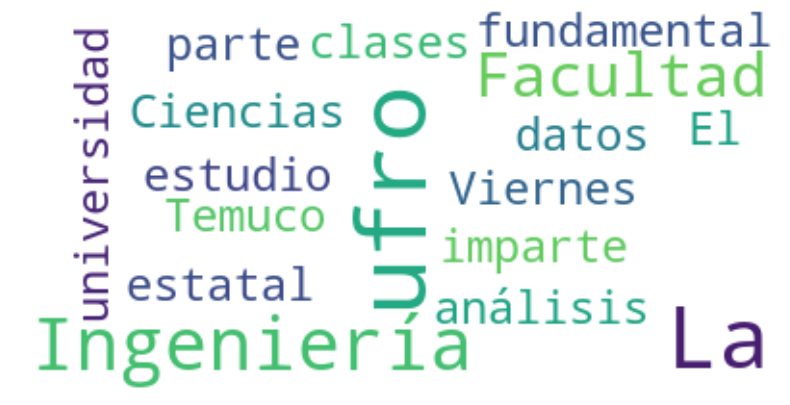

In [49]:
wordcloud = WordCloud(max_font_size=50,min_font_size=6,max_words=50,background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig(r'frecuencias.jpg',dpi=100)
plt.show()

# Vectores TF-IDF
Comencemos a contruir los vectores TF-IDF (Frecuencia de término por frecuencia inversa en el documento).

Ley de Zipf: Establece que, dado un corpus suficientemente grande de lenguaje natural, la frecuencia de cualquier palabra es inversamente proporcional a su rango en la tabla de frecuencias.

Ejemplo:

In [53]:
from nltk.corpus import brown
import nltk
# nltk.download('brown')
print(brown.words()[:20])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


In [54]:
len(brown.words())

1161192

In [55]:
#relacion exponencial
from collections import Counter
puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
word_list = (x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
token_counts.most_common(20)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

La frecuencia inversa en el documentos o IDF, es nuestra ventana a través de Zipf para una modelación orientada al análisis de temas.

Podemos contar los tokens y agruparlos de dos maneras: por documento y en todo el corpus.

In [78]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

kite_text = open(r'kite_text.txt','r')
kite_text = kite_text.read()
kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro)

kite_history = open(r'kite_history.txt','r')
kite_history = kite_history.read()
kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)

In [79]:
print(kite_intro)

a kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. a kite consists of wings, tethers, and anchors. kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. a kite's wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. a kite may have fixed or moving anchors. untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite.

the lift that sustains the kite in flight is generated when air flows around the kite's surface, producing low pressure above and high pressure below the wings. the interaction with the wind also generates horizontal drag along the direction of the wind. the resultant force vector from the lift and drag force components is opposed by the tension of one or mo

In [80]:
intro_total = len(intro_tokens)
print(intro_total)

363


In [81]:
print(kite_history)
history_total = len(history_tokens)
print(history_total)

kites were invented in china, where materials ideal for kite building were readily available: silk fabric for sail material; fine, high-tensile-strength silk for flying line; and resilient bamboo for a strong, lightweight framework.

the kite has been claimed as the invention of the 5th-century bc chinese philosophers mozi (also mo di) and lu ban (also gongshu ban). by 549 ad paper kites were certainly being flown, as it was recorded that in that year a paper kite was used as a message for a rescue mission. ancient and medieval chinese sources describe kites being used for measuring distances, testing the wind, lifting men, signaling, and communication for military operations. the earliest known chinese kites were flat (not bowed) and often rectangular. later, tailless kites incorporated a stabilizing bowline. kites were decorated with mythological motifs and legendary figures; some were fitted with strings and whistles to make musical sounds while flying. from china, kites were introd

In [82]:
from collections import Counter
intro_tf = {}
history_tf = {}
intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_total
history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total


In [83]:
print(intro_tf)
print(history_tf)

{'kite': 0.0440771349862259}
{'kite': 0.020202020202020204}


In [84]:
intro_tf['and'] = intro_counts['and'] / intro_total
history_tf['and'] = history_counts['and'] / history_total
print(intro_tf)
print(history_tf)

{'kite': 0.0440771349862259, 'and': 0.027548209366391185}
{'kite': 0.020202020202020204, 'and': 0.030303030303030304}


In [85]:
intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total
print(intro_tf)
print(history_tf)

{'kite': 0.0440771349862259, 'and': 0.027548209366391185, 'china': 0.0}
{'kite': 0.020202020202020204, 'and': 0.030303030303030304, 'china': 0.010101010101010102}


In [86]:
num_docs_containing_and = 0
for doc in [intro_tokens, history_tokens]:
    if 'and' in doc:
        num_docs_containing_and += 1
num_docs_containing_kite = 0
for doc in [intro_tokens, history_tokens]:
    if 'kite' in doc:
        num_docs_containing_kite += 1
num_docs_containing_china = 0
for doc in [intro_tokens, history_tokens]:
    if 'china' in doc:
        num_docs_containing_china += 1

In [87]:
print(num_docs_containing_kite)
print(num_docs_containing_and)
print(num_docs_containing_china)

2
2
1


In [88]:
num_docs = 2
intro_idf = {}
history_idf = {}
intro_idf['kite'] = num_docs + 1 / (num_docs_containing_kite)
history_idf['kite'] = num_docs + 1 / (num_docs_containing_kite)
intro_idf['and'] = num_docs + 1 / (num_docs_containing_and)
history_idf['and'] = num_docs + 1 / (num_docs_containing_and)
intro_idf['china'] = num_docs + 1 / (num_docs_containing_china)
history_idf['china'] = num_docs + 1 / (num_docs_containing_china)

In [89]:
print(intro_idf)
print(history_idf)
#mientras mas frecuente es la palabra en un doc menor es el valor, kite aparece en todos

{'kite': 2.5, 'and': 2.5, 'china': 3.0}
{'kite': 2.5, 'and': 2.5, 'china': 3.0}


In [90]:
intro_tf

{'kite': 0.0440771349862259, 'and': 0.027548209366391185, 'china': 0.0}

In [91]:
intro_tfidf = {}
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

In [92]:
history_tfidf = {}
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

In [93]:
print(intro_tfidf)
print('---------------------------------------------------------------------------------------')
print(history_tfidf)

{'kite': 0.11019283746556474, 'and': 0.06887052341597796, 'china': 0.0}
---------------------------------------------------------------------------------------
{'kite': 0.05050505050505051, 'and': 0.07575757575757576, 'china': 0.030303030303030304}


# Método TF-IDF para vectorizar documentos

In [94]:
# Añadimos ley de Zipf, log(IDF)
import math
intro_tfidf['kite'] = intro_tf['kite'] * math.log(intro_idf['kite'])
intro_tfidf['and'] = intro_tf['and'] * math.log(intro_idf['and'])
intro_tfidf['china'] = intro_tf['china'] * math.log(intro_idf['china'])
history_tfidf['kite'] = history_tf['kite'] * math.log(history_idf['kite'])
history_tfidf['and'] = history_tf['and'] * math.log(history_idf['and'])
history_tfidf['china'] = history_tf['china'] * math.log(history_idf['china'])

In [95]:
print(intro_tfidf)
print(history_tfidf)

{'kite': 0.040387470275444856, 'and': 0.025242168922153033, 'china': 0.0}
{'kite': 0.01851092387624556, 'and': 0.027766385814368338, 'china': 0.011097093824930402}


Implementación método TF-IDF

In [96]:
docs = ["La UFRO está en Temuco, y yo estudio en la ufro."]
docs.append("La Ufro es una universidad estatal.")
docs.append("Facultad de Ingeniería y Ciencias Ufro.")
docs.append("La facultad de Ingeniería de la ufro imparte clases los Viernes")
docs.append("El análisis de datos es fundamental en ingeniería")
print(docs)

['La UFRO está en Temuco, y yo estudio en la ufro.', 'La Ufro es una universidad estatal.', 'Facultad de Ingeniería y Ciencias Ufro.', 'La facultad de Ingeniería de la ufro imparte clases los Viernes', 'El análisis de datos es fundamental en ingeniería']


tf: cuando importa la palabra en el doc

In [58]:
import copy
from collections import Counter
import math
from nltk.tokenize import TreebankWordTokenizer
from collections import OrderedDict
tokenizer = TreebankWordTokenizer()
def TFIDF_vec(docs, tokenizer):
    doc_tokens = []
    tokens_in_doc = []
    for doc in docs:
        tokens = tokenizer.tokenize(doc.lower())
        doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
        token_counts = Counter(tokens)
        tokens_in_doc.append(len(token_counts))
    all_doc_tokens = sum(doc_tokens, [])
    lexico = sorted(set(all_doc_tokens))
    zero_vector = OrderedDict((token, 0) for token in lexico)
    tokenizer = tokenizer
    document_tfidf_vectors = []
    for i, doc in enumerate(docs):
        vec = copy.copy(zero_vector)
        tokens = tokenizer.tokenize(doc.lower())
        token_counts = Counter(tokens)
        for key, value in token_counts.items():
            docs_containing_key = 0
            for _doc in docs:
                if key in _doc.lower():
                    docs_containing_key += 1
            tf = value / tokens_in_doc[i]
            idf = len(docs) / (docs_containing_key)
            vec[key] = tf * math.log(idf)
        document_tfidf_vectors.append(vec)
    return document_tfidf_vectors

document_tfidf_vectors = TFIDF_vec(docs, tokenizer)
print(document_tfidf_vectors)


[OrderedDict([(',', 0.16094379124341004), ('.', 0.051082562376599076), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0.04462871026284196), ('es', 0), ('estatal', 0), ('estudio', 0.16094379124341004), ('está', 0.16094379124341004), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.04462871026284196), ('los', 0), ('parte', 0), ('temuco', 0.16094379124341004), ('ufro', 0.04462871026284196), ('una', 0), ('universidad', 0), ('viernes', 0), ('y', 0.09162907318741552), ('yo', 0.16094379124341004)]), OrderedDict([(',', 0), ('.', 0.07297508910942724), ('análisis', 0), ('ciencias', 0), ('clases', 0), ('datos', 0), ('de', 0), ('el', 0), ('en', 0), ('es', 0.0), ('estatal', 0.22991970177630003), ('estudio', 0), ('está', 0), ('facultad', 0), ('fundamental', 0), ('imparte', 0), ('ingeniería', 0), ('la', 0.03187765018774425), ('los', 0), ('parte', 0), ('temuco', 0), ('ufro', 0.03187765018774425), ('una', 0.22991970177630003),

In [59]:
document_tfidf_vectors[0]

OrderedDict([(',', 0.16094379124341004),
             ('.', 0.051082562376599076),
             ('análisis', 0),
             ('ciencias', 0),
             ('clases', 0),
             ('datos', 0),
             ('de', 0),
             ('el', 0),
             ('en', 0.04462871026284196),
             ('es', 0),
             ('estatal', 0),
             ('estudio', 0.16094379124341004),
             ('está', 0.16094379124341004),
             ('facultad', 0),
             ('fundamental', 0),
             ('imparte', 0),
             ('ingeniería', 0),
             ('la', 0.04462871026284196),
             ('los', 0),
             ('parte', 0),
             ('temuco', 0.16094379124341004),
             ('ufro', 0.04462871026284196),
             ('una', 0),
             ('universidad', 0),
             ('viernes', 0),
             ('y', 0.09162907318741552),
             ('yo', 0.16094379124341004)])

In [60]:
document_tfidf_vectors[1]

OrderedDict([(',', 0),
             ('.', 0.07297508910942724),
             ('análisis', 0),
             ('ciencias', 0),
             ('clases', 0),
             ('datos', 0),
             ('de', 0),
             ('el', 0),
             ('en', 0),
             ('es', 0.0),
             ('estatal', 0.22991970177630003),
             ('estudio', 0),
             ('está', 0),
             ('facultad', 0),
             ('fundamental', 0),
             ('imparte', 0),
             ('ingeniería', 0),
             ('la', 0.03187765018774425),
             ('los', 0),
             ('parte', 0),
             ('temuco', 0),
             ('ufro', 0.03187765018774425),
             ('una', 0.22991970177630003),
             ('universidad', 0.22991970177630003),
             ('viernes', 0),
             ('y', 0),
             ('yo', 0)])

Veamos la Similitud entre los documentos:

In [61]:
sim_coseno(document_tfidf_vectors[1], document_tfidf_vectors[0])


0.042157254664719736

In [62]:
sim_coseno(document_tfidf_vectors[2], document_tfidf_vectors[0])

0.13894016582622692

In [63]:
sim_coseno(document_tfidf_vectors[1], document_tfidf_vectors[2])

0.054685682334668945

In [64]:
sim_coseno(document_tfidf_vectors[2], document_tfidf_vectors[2])

1.0

Algunas implementaciones de método TD-IDF normalizan los vectores luego de hacer la transformación.

Veamos la implementación con Scikit-Learn:

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = docs
vectorizer = TfidfVectorizer(min_df=1, encoding='utf-8')
model = vectorizer.fit_transform(corpus)


In [66]:
vectorizer.vocabulary_

{'la': 15,
 'ufro': 19,
 'está': 10,
 'en': 6,
 'temuco': 18,
 'yo': 23,
 'estudio': 9,
 'es': 7,
 'una': 20,
 'universidad': 21,
 'estatal': 8,
 'facultad': 11,
 'de': 4,
 'ingeniería': 14,
 'ciencias': 1,
 'parte': 17,
 'imparte': 13,
 'clases': 2,
 'los': 16,
 'viernes': 22,
 'el': 5,
 'análisis': 0,
 'datos': 3,
 'fundamental': 12}

In [67]:
list(sorted(vectorizer.vocabulary_))

['análisis',
 'ciencias',
 'clases',
 'datos',
 'de',
 'el',
 'en',
 'es',
 'estatal',
 'estudio',
 'está',
 'facultad',
 'fundamental',
 'imparte',
 'ingeniería',
 'la',
 'los',
 'parte',
 'temuco',
 'ufro',
 'una',
 'universidad',
 'viernes',
 'yo']

In [68]:
len(list(sorted(vectorizer.vocabulary_)))

24

In [69]:
print(docs[0])
print(docs[1])
print(docs[2])
print(docs[3])
print(docs[4])

La UFRO está en Temuco, y yo estudio en la ufro.
La Ufro es una universidad estatal.
La Facultad de Ingeniería y Ciencias es parte de la Ufro.
La facultad de Ingeniería de la ufro imparte clases los Viernes
El análisis de datos es fundamental en ingeniería


In [70]:
model.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.53364369, 0.        , 0.        , 0.3307188 ,
         0.3307188 , 0.        , 0.        , 0.        , 0.        ,
         0.3726424 , 0.        , 0.        , 0.3307188 , 0.3726424 ,
         0.        , 0.        , 0.        , 0.3307188 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.33142212, 0.49487286, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.27880274, 0.        , 0.        , 0.        , 0.27880274,
         0.49487286, 0.49487286, 0.        , 0.        ],
        [0.        , 0.37989606, 0.        , 0.        , 0.50884164,
         0.        , 0.        , 0.25442082, 0.        , 0.        ,
         0.        , 0.30649775, 0.        , 0.        , 0.25442082,
         0.42805363, 0.        , 0.37989606, 0.        , 0.21402681,
         0.        , 0.        , 0.        , 0.        ]

In [71]:
model.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.53364369, 0.        , 0.        , 0.3307188 ,
         0.3307188 , 0.        , 0.        , 0.        , 0.        ,
         0.3726424 , 0.        , 0.        , 0.3307188 , 0.3726424 ,
         0.        , 0.        , 0.        , 0.3307188 ]])

In [72]:
model.todense()[1]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.33142212, 0.49487286, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.27880274, 0.        , 0.        , 0.        , 0.27880274,
         0.49487286, 0.49487286, 0.        , 0.        ]])

In [73]:
model.todense()[2]

matrix([[0.        , 0.37989606, 0.        , 0.        , 0.50884164,
         0.        , 0.        , 0.25442082, 0.        , 0.        ,
         0.        , 0.30649775, 0.        , 0.        , 0.25442082,
         0.42805363, 0.        , 0.37989606, 0.        , 0.21402681,
         0.        , 0.        , 0.        , 0.        ]])

# Algunas variantes de la vectorización TF-IDF

Actividades

# Ejercicio 1:

Muestre la nube de palabras del documento "archivo_en_ingles.txt".

Considere cada oración de "archivo_en_ingles.txt" como documento y realice una vectorización de tipo bolsa de palabras y otra de tipo TF de cada documento.

Encuentre las dos oraciones más similares del documento (de acuerdo a la similitud coseno) utilizando cada una de las dos vectorizaciones.

# Ejercicio 2:

Muestre la nube de palabras del documento "archivo_en_castellano.txt".

Considere cada oración de "archivo_en_castellano.txt" como documento y realice una vectorización de tipo TFIDF de cada documento.

Encuentre las dos oraciones menos similares del documento (de acuerdo a la similitud coseno).


In [97]:
def BoW_vec(docs, tokenizer):
    doc_tokens = []
    for doc in docs:
        #tokenizo y en minúscula
        tokens = tokenizer.tokenize(doc.lower())
        doc_tokens += [sorted(tokens)]
    all_doc_tokens = sum(doc_tokens, [])
    lexico = sorted(set(all_doc_tokens))
    zero_vector = OrderedDict((token, 0) for token in lexico)
    document_bow_vectors = []
    for i, doc in enumerate(docs):
        vec = copy.copy(zero_vector)
        tokens = tokenizer.tokenize(doc.lower())
        token_counts = Counter(tokens)
        for key, value in token_counts.items():
            vec[key] = value
        document_bow_vectors.append(vec)
    return document_bow_vectors


In [115]:
kite_text = open(r'archivo_en_ingles.txt','r')
kite_text = kite_text.read()

stop_words = nltk.corpus.stopwords.words('english')
text = casual_tokenize(kite_text)

tokens = [x for x in text if x and x not in stop_words]
text = ''
for tok in tokens:
    text = text + ' ' + tok

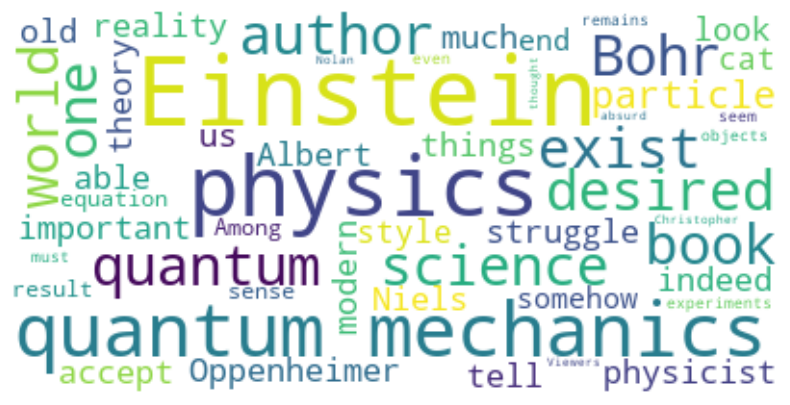

In [116]:
wordcloud = WordCloud(max_font_size=50,min_font_size=6,max_words=50,background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig(r'frecuencias.jpg',dpi=100)
plt.show()

In [117]:
#Construir la Bolsa de palabras
tokenizer = TreebankWordTokenizer()
#tokenizo, minuscula
puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
tokens = tokenizer.tokenize(text.lower() for text if text not in puncs)
# Filtrar signos de puntuación
tokens = [token for token in tokens if token not in {',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'}]

print(tokens)
#imprimo cantidad de palabras
print(len(tokens))

['einstein', 'thought', 'quantum', 'mechanics', 'absurd', 'viewers', 'christopher', 'nolan', '’', 'oscar-hoovering', 'biopic', 'physicist', 'j', 'robert', 'oppenheimer', 'learned', 'lot', 'race', 'build', 'nuclear', 'weapons', 'much', 'hero', '’', 'involvement', 'arguably', 'much', 'important', 'debate', 'science', 'ought', 'able', 'tell', 'us', 'reality', 'oppenheimer', 'walk-on', 'part', 'quantum', 'drama', 'jim', 'baggott', 'john', 'l', 'heilbron', '’', 'account', 'epic', 'struggle', 'here', '’', 'introduced', 'psychologically', 'tender', 'quoted', 'declaring', 'albert', 'einstein', 'impersonated', 'movie', 'tom', 'conti', 'understanding', 'interest', 'modern', 'physics', 'it', 'indeed', 'popular', 'history', 'time', 'danish', 'genius', 'niels', 'bohr', 'comrades', 'built', 'startling', 'edifice', 'quantum', 'mechanics', 'albert', 'einstein', 'already', 'old', 'set', 'ways', 'accept', 'spent', 'rest', 'life', 'kvetching', 'impotently', 'sidelines', 'in', 'fact', 'hugely', 'detailed'

In [113]:
from collections import Counter
puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
word_list = (x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
token_counts.most_common(20)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]